Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


Load Dataset

In [3]:
df = pd.read_csv("/content/creditcard.csv")
print(df.head())
print(df['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Data Preprocessing

In [4]:
X = df.drop("Class", axis=1)
y = df["Class"]


Feature Scaling

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Train-Test Split

In [6]:
mask_not_nan = y.notna()

X_filtered = X_scaled[mask_not_nan]
y_filtered = y[mask_not_nan]

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered,
    y_filtered,
    test_size=0.2,
    stratify=y_filtered,
    random_state=42
)

LOGISTIC REGRESSION MODEL(Train Logistic regression model)

In [7]:
lr_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)

lr_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

Logistic Regression Prediction

In [8]:
lr_pred = lr_model.predict(X_test)
lr_prob = lr_model.predict_proba(X_test)[:, 1]


Logistic Regression Evaluation

In [9]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, lr_prob))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       795
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00       795
   macro avg       0.50      0.50      0.50       795
weighted avg       1.00      1.00      1.00       795

ROC-AUC Score: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: 

RANDOM FOREST MODEL(Train Random Forest Model)

In [10]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

Random Forest Prediction

In [11]:
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]


Random Forest Evaluation

In [12]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, rf_prob))


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       795

    accuracy                           1.00       795
   macro avg       1.00      1.00      1.00       795
weighted avg       1.00      1.00      1.00       795

ROC-AUC Score: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


MODEL COMPARISON (ROC CURVE)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


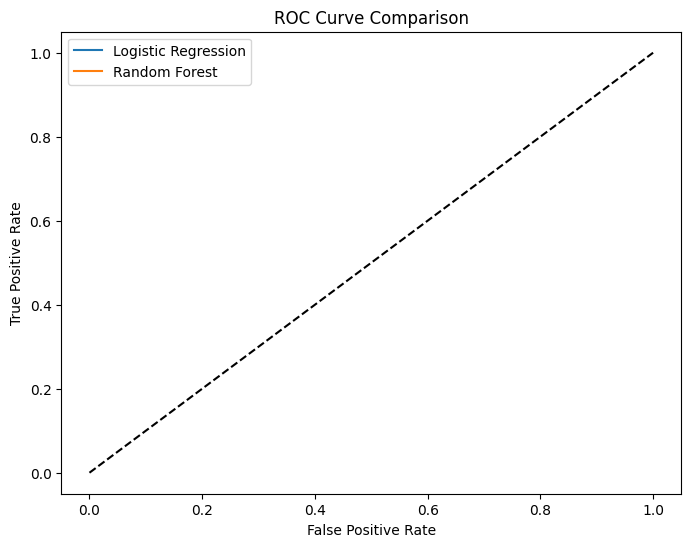

In [13]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

plt.figure(figsize=(8,6))
plt.plot(lr_fpr, lr_tpr, label="Logistic Regression")
plt.plot(rf_fpr, rf_tpr, label="Random Forest")
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


Business Cost Evaluation

In [14]:
CF = 10  # Fraud miss cost
CN = 1   # False alarm cost

FN = np.sum((y_test == 1) & (rf_pred == 0))
FP = np.sum((y_test == 0) & (rf_pred == 1))

total_cost = CF * FN + CN * FP
print("Total Business Cost (Random Forest):", total_cost)


Total Business Cost (Random Forest): 0


Threshold Optimization

In [15]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, rf_prob)

best_threshold = thresholds[np.argmax(recall - precision)]
print("Optimized Threshold:", best_threshold)

rf_pred_opt = (rf_prob > best_threshold).astype(int)


Optimized Threshold: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Risk Score Instead of Binary Output

In [16]:
risk_score = rf_prob

df_risk = pd.DataFrame({
    "Actual": y_test.values,
    "RiskScore": risk_score
})

df_risk.head()


,Actual,RiskScore
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


Cost-Sensitive Evaluation

In [17]:
CF = 10  # Cost of missing fraud
CN = 1   # Cost of false alarm

FN = np.sum((y_test == 1) & (rf_pred_opt == 0))
FP = np.sum((y_test == 0) & (rf_pred_opt == 1))

total_cost = CF * FN + CN * FP
print("Total Business Cost:", total_cost)


Total Business Cost: 17


Time-Aware Train/Test Split

In [18]:
df_sorted = df.sort_values("Time")

X = df_sorted.drop("Class", axis=1)
y = df_sorted["Class"]

X_scaled = scaler.fit_transform(X)

split = int(0.8 * len(X))
X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y[:split], y[split:]


Feature Importance

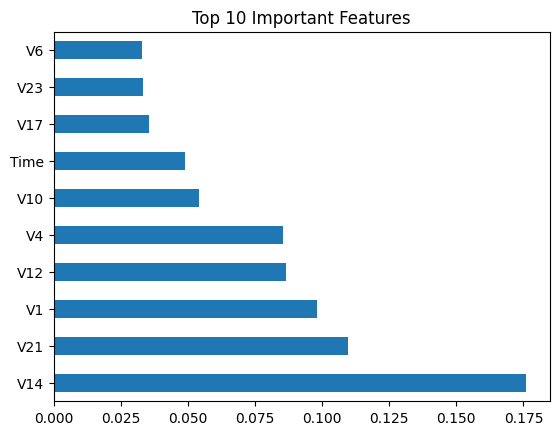

In [19]:
importances = rf_model.feature_importances_
features = df.drop("Class", axis=1).columns

feat_imp = pd.Series(importances, index=features)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


Ensemble of Models

In [20]:
final_score = 0.6 * rf_prob + 0.4 * lr_prob
final_pred = (final_score > best_threshold).astype(int)


Model Drift Detection

In [21]:
# Predict rf_prob for the current X_test from the time-aware split
rf_prob_current_split = rf_model.predict_proba(X_test)[:, 1]

# Filter out NaN values from y_test and corresponding rf_prob_current_split
mask_not_nan_y_test = y_test.notna()
y_test_clean = y_test[mask_not_nan_y_test]
rf_prob_clean = rf_prob_current_split[mask_not_nan_y_test]

if roc_auc_score(y_test_clean, rf_prob_clean) < 0.7:
    print("⚠️ Model drift detected – retraining required")

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Cross-Validation for Robustness

In [22]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Filter out NaN values from y and corresponding X_scaled
mask_not_nan = y.notna()
X_filtered_cv = X_scaled[mask_not_nan]
y_filtered_cv = y[mask_not_nan]

cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(
    rf_model, X_filtered_cv, y_filtered_cv, scoring='roc_auc', cv=cv
)

print("Mean ROC-AUC:", scores.mean())

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Mean ROC-AUC: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [23]:
print(X_train.shape[1])


30


In [25]:
import joblib
joblib.dump(rf_model, "fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [26]:
%%writefile app.py
from fastapi import FastAPI
import joblib
import numpy as np

app = FastAPI(title="Credit Card Fraud Detection API")

model = joblib.load("fraud_model.pkl")
scaler = joblib.load("scaler.pkl")

FEATURE_COUNT = 30

@app.post("/predict")
def predict(features: list):
    if len(features) != FEATURE_COUNT:
        return {
            "error": f"Expected {FEATURE_COUNT} features, got {len(features)}"
        }

    data = np.array(features).reshape(1, -1)
    data = scaler.transform(data)
    prediction = model.predict(data)[0]
    probability = model.predict_proba(data)[0][1]

    return {
        "prediction": "Fraud" if prediction == 1 else "Genuine",
        "fraud_probability": round(float(probability), 4)
    }


Writing app.py


In [1]:
!pip install pyngrok

from pyngrok import ngrok
ngrok.set_auth_token("38boRCYYO4j6NGCtqLIphQ5kIer_kmfMxp5KmXGoYtmmuPok")


In [1]:
!uvicorn app:app --host 0.0.0.0 --port 8000 &


INFO:     Started server process [15678]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [15678]


In [3]:
public_url = ngrok.connect(8000)
print("NEW Public URL:", public_url)


NameError: name 'ngrok' is not defined

In [4]:
from pyngrok import ngrok

public_url = ngrok.connect(8000)
print("Public API URL:", public_url)


Public API URL: NgrokTunnel: "https://painstakingly-sorediate-kelsi.ngrok-free.dev" -> "http://localhost:8000"


In [5]:
!ps aux | grep uvicorn


root       16208  0.0  0.0   7372  3516 ?        S    11:03   0:00 /bin/bash -c ps aux | grep uvicorn
root       16210  0.0  0.0   6480  2380 ?        S    11:03   0:00 grep uvicorn
